Биномиальное распределение
E = 2.4
Var = 2.112
Std = 1.453272169966796
Mode = 2


,k,P(X=k),F(X≤k)
0,0,7.756279e-02,0.077563
1,1,2.115349e-01,0.289098
2,2,2.740338e-01,0.563132
3,3,2.242095e-01,0.787341
4,4,1.299396e-01,0.917281
5,5,5.670092e-02,0.973982
6,6,1.932986e-02,0.993311
7,7,5.271779e-03,0.998583
8,8,1.168178e-03,0.999751
9,9,2.123961e-04,0.999964


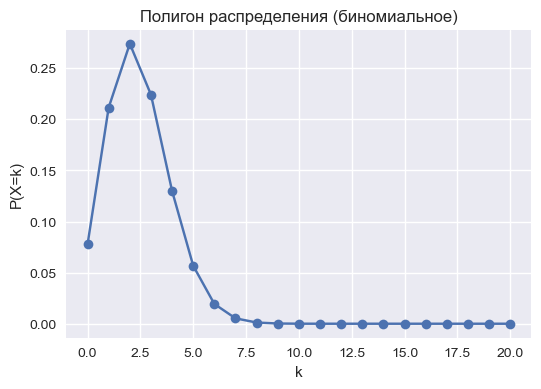


Распределение Пуассона
E = 3.4
Var = 3.4
Std = 1.8439088914585775
Mode = 3


,k,P(X=k),F(X≤k)
0,0,0.033373,0.033373
1,1,0.113469,0.146842
2,2,0.192898,0.339740
3,3,0.218617,0.558357
4,4,0.185825,0.744182
5,5,0.126361,0.870542
6,6,0.071604,0.942147
7,7,0.034779,0.976926
8,8,0.014781,0.991707
9,9,0.005584,0.997291


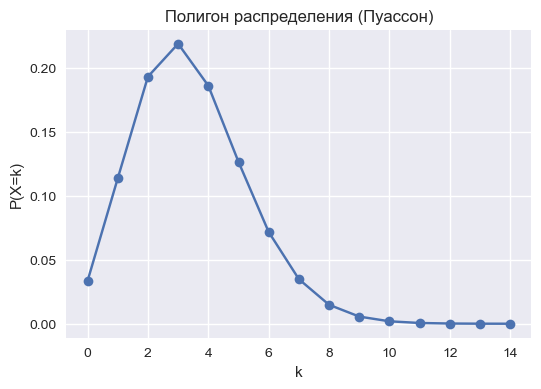


Геометрическое распределение
E = 10.0
Var = 89.99999999999999
Std = 9.486832980505138
Mode = 1


,k,P(X=k),F(X≤k)
0,1,0.100000,0.100000
1,2,0.090000,0.190000
2,3,0.081000,0.271000
3,4,0.072900,0.343900
4,5,0.065610,0.409510
5,6,0.059049,0.468559
6,7,0.053144,0.521703
7,8,0.047830,0.569533
8,9,0.043047,0.612580
9,10,0.038742,0.651322


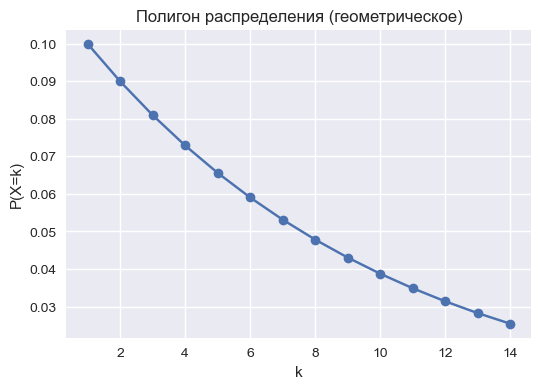


Гипергеометрическое распределение
E = 1.5
Var = 0.9807692307692307
Std = 0.9903379376602871
Mode ≈ 1


,k,P(X=k),F(X≤k)
0,0,0.154694,0.154694
1,1,0.371266,0.525960
2,2,0.321288,0.847248
3,3,0.126929,0.974177
4,4,0.023799,0.997976
5,5,0.001970,0.999945
6,6,0.000055,1.000000


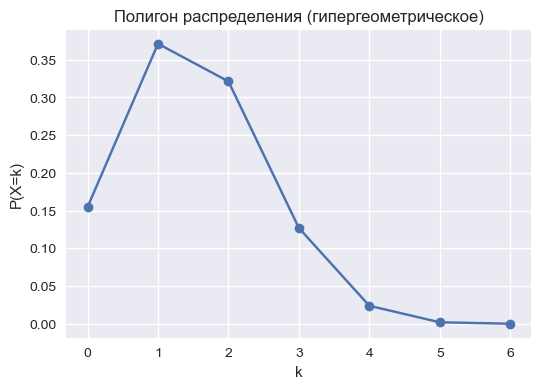

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

# ============================================================
# 1. БИНОМИАЛЬНОЕ РАСПРЕДЕЛЕНИЕ
# ------------------------------------------------------------
# Условие:
# На автоматическом производстве каждый собранный гаджет проходит финальный тест.
# Вероятность того, что тест будет пройден успешно — 0.12.
# За день собирается 20 устройств.
# X — число устройств, прошедших тест.

n = 20
p = 0.12
x_bin = np.arange(0, n+1)
pmf_bin = [math.comb(n, k)*(p**k)*((1-p)**(n-k)) for k in x_bin]
cdf_bin = np.cumsum(pmf_bin)

E_bin = n*p
Var_bin = n*p*(1-p)
Std_bin = math.sqrt(Var_bin)
Mode_bin = math.floor((n+1)*p)

print("Биномиальное распределение")
print("E =", E_bin)
print("Var =", Var_bin)
print("Std =", Std_bin)
print("Mode =", Mode_bin)

df_bin = pd.DataFrame({"k": x_bin, "P(X=k)": pmf_bin, "F(X≤k)": cdf_bin})
display(df_bin)

plt.figure(figsize=(6,4))
plt.plot(x_bin, pmf_bin, marker="o")
plt.title("Полигон распределения (биномиальное)")
plt.xlabel("k")
plt.ylabel("P(X=k)")
plt.grid(True)
plt.show()


# ============================================================
# 2. РАСПРЕДЕЛЕНИЕ ПУАССОНА
# ------------------------------------------------------------
# Условие:
# Дрон-курьер в среднем получает 3.4 запроса на доставку за 1 минуту.
# X — число запросов за случайную минуту.

lam = 3.4
x_pois = np.arange(0, 15)
pmf_pois = [math.exp(-lam) * lam**k / math.factorial(k) for k in x_pois]
cdf_pois = np.cumsum(pmf_pois)

E_pois = lam
Var_pois = lam
Std_pois = math.sqrt(lam)
Mode_pois = math.floor(lam)

print("\nРаспределение Пуассона")
print("E =", E_pois)
print("Var =", Var_pois)
print("Std =", Std_pois)
print("Mode =", Mode_pois)

df_pois = pd.DataFrame({"k": x_pois, "P(X=k)": pmf_pois, "F(X≤k)": cdf_pois})
display(df_pois)

plt.figure(figsize=(6,4))
plt.plot(x_pois, pmf_pois, marker="o")
plt.title("Полигон распределения (Пуассон)")
plt.xlabel("k")
plt.ylabel("P(X=k)")
plt.grid(True)
plt.show()


# ============================================================
# 3. ГЕОМЕТРИЧЕСКОЕ РАСПРЕДЕЛЕНИЕ
# ------------------------------------------------------------
# Условие:
# Контролёр проверяет изделия подряд.
# Вероятность брака — 0.1.
# X — номер первой найденной бракованной детали.

p = 0.1
x_geo = np.arange(1, 15)
pmf_geo = [(1-p)**(k-1) * p for k in x_geo]
cdf_geo = np.cumsum(pmf_geo)

E_geo = 1/p
Var_geo = (1-p)/p**2
Std_geo = math.sqrt(Var_geo)
Mode_geo = 1

print("\nГеометрическое распределение")
print("E =", E_geo)
print("Var =", Var_geo)
print("Std =", Std_geo)
print("Mode =", Mode_geo)

df_geo = pd.DataFrame({"k": x_geo, "P(X=k)": pmf_geo, "F(X≤k)": cdf_geo})
display(df_geo)

plt.figure(figsize=(6,4))
plt.plot(x_geo, pmf_geo, marker="o")
plt.title("Полигон распределения (геометрическое)")
plt.xlabel("k")
plt.ylabel("P(X=k)")
plt.grid(True)
plt.show()


# ============================================================
# 4. ГИПЕРГЕОМЕТРИЧЕСКОЕ РАСПРЕДЕЛЕНИЕ
# ------------------------------------------------------------
# Условие:
# На складе 40 микросхем, из них 6 — дефектные.
# Проводят выборку из 10 микросхем без возвращения.
# X — число дефектных среди выбранных 10.

N = 40     # всего
K = 6      # дефектных
n = 10     # выборка
x_hyper = np.arange(0, 7)

def hyper_pmf(k):
    return math.comb(K, k) * math.comb(N-K, n-k) / math.comb(N, n)

pmf_hyper = [hyper_pmf(k) for k in x_hyper]
cdf_hyper = np.cumsum(pmf_hyper)

E_hyper = n * K / N
Var_hyper = n*(K/N)*(1-K/N)*( (N-n)/(N-1) )
Std_hyper = math.sqrt(Var_hyper)
Mode_hyper = math.floor((n+1)*(K+1)/(N+2))

print("\nГипергеометрическое распределение")
print("E =", E_hyper)
print("Var =", Var_hyper)
print("Std =", Std_hyper)
print("Mode ≈", Mode_hyper)

df_hyper = pd.DataFrame({"k": x_hyper, "P(X=k)": pmf_hyper, "F(X≤k)": cdf_hyper})
display(df_hyper)

plt.figure(figsize=(6,4))
plt.plot(x_hyper, pmf_hyper, marker="o")
plt.title("Полигон распределения (гипергеометрическое)")
plt.xlabel("k")
plt.ylabel("P(X=k)")
plt.grid(True)
plt.show()
